In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

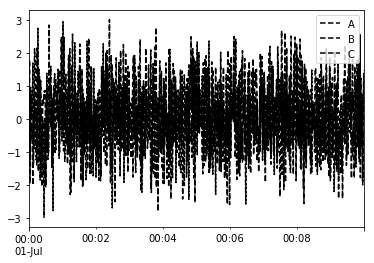

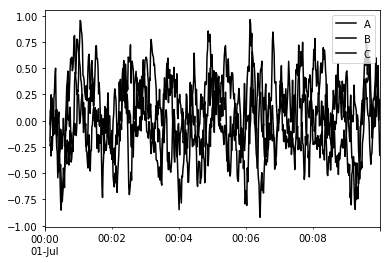

In [3]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [4]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\karlk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,-0.234405,0.918900,0.148800
2016-07-01 00:00:02,0.199642,0.105343,-0.643368
2016-07-01 00:00:03,0.032935,0.204451,-0.160050
2016-07-01 00:00:04,-0.015275,0.340985,-0.082909
2016-07-01 00:00:05,-0.133804,0.241834,-0.064101
2016-07-01 00:00:06,-0.248722,0.014472,-0.019353
2016-07-01 00:00:07,-0.313962,-0.368233,0.307313
2016-07-01 00:00:08,-0.238072,-0.331756,0.003330
2016-07-01 00:00:09,-0.218666,-0.428518,-0.026495


In [5]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [6]:
df.head()

,A,B,C,D
2016-06-06,-0.829884,0.649261,0.311676,-1.530069
2016-06-07,-1.227087,-0.121038,-1.230110,1.195779
2016-06-08,-0.403125,0.451209,0.728803,0.960878
2016-06-09,0.647039,-0.613482,0.548135,-2.103441
2016-06-10,1.090011,0.889997,1.365907,1.110975


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C403A5128>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000016C4057F908>], dtype=object)

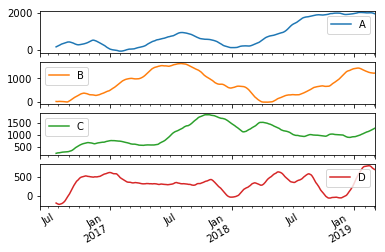

In [7]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [8]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.739729,0.450840,1.941549,0.651131


In [9]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-1.443427,0.588741,-0.303379,-0.932179
2016-06-08,-1.782316,0.718971,-0.265463,-0.412590
2016-06-09,-1.790001,0.630716,-0.109471,-0.678656
2016-06-10,-1.576610,0.755762,0.257305,-0.616100


# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

It depends, However if you care about the trends of todays sales, then you may want to look into rolling statistic. 

# EWMA
# Why use EWMA?

If you care about a weeks worth of sales for example, you may want to go  with a window approach. Or more specifically if the past data is relevant to todays data then the 

# Go do it!
## pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [14]:
from pandas import Series
from pandas import read_csv

path = "C:\\Users\\karlk\\daily-total-female-births-in-cal.csv"
series = read_csv(path, header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64


Rolling:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C40405F28>], dtype=object)

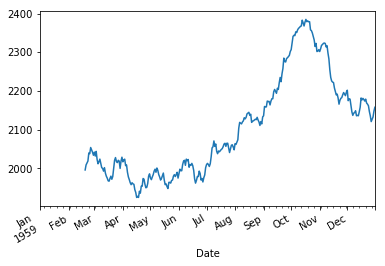

In [15]:
series.rolling(window = 50).sum().plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C40A1A940>], dtype=object)

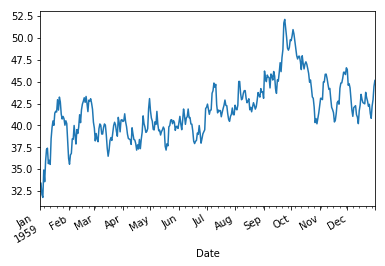

In [16]:
series.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean().plot(subplots=True)

In this case it would depend on what question you are asking to decide which method to use. If you were just looking at the data in say November then you may just want to use rolling, if you care more about the over all trend for the entire year the ewm may be more appropriate.